In [3]:
import pandas as pd

# Check filenames from the left panel
dataset1_path = "/content/020725_DSD_Store_Lists.xlsx"  # Adjust based on actual file name
dataset2_path = "/content/final_cleaned (1).xlsx"  # Adjust based on actual file name

# Load datasets
dataset1 = pd.read_excel(dataset1_path, sheet_name=None)  # Loads all sheets
dataset2 = pd.read_excel(dataset2_path)  # Single sheet (change if needed)

# Print available sheets in dataset1
print("Available sheets in dataset1:", dataset1.keys())


Available sheets in dataset1: dict_keys(['BI LOOKUP', 'King Soopers', 'Costco', 'Safeway', 'Sprouts', 'Whole Foods', 'Nat Groc', 'Walmart', 'Target', 'All Others'])


In [4]:
import pandas as pd

# File paths
dataset1_path = "/content/020725_DSD_Store_Lists.xlsx"
dataset2_path = "/content/final_cleaned (1).xlsx"

# Load dataset2
dataset2 = pd.read_excel(dataset2_path)

# Load all sheets from dataset1
dataset1_sheets = pd.read_excel(dataset1_path, sheet_name=None)  # Load all sheets as a dictionary

# Combine all sheets into a single dataframe
df1_list = []
for sheet_name, df in dataset1_sheets.items():
    df['SOURCE_SHEET'] = sheet_name  # Add sheet name as an identifier
    df1_list.append(df)

df1_combined = pd.concat(df1_list, ignore_index=True)

# Display first few rows to verify
print(df1_combined.head())


      SHIPTO CUSTOMER NAME         CUST NAME (EDIT) CHAIN SOURCE_SHEET  \
0           CLARK`S MARKET           CLARK`S MARKET    AO    BI LOOKUP   
1          *CRAIG HOSPITAL           CRAIG HOSPITAL    AO    BI LOOKUP   
2  CU- ALFRED PACKER GRILL  CU- ALFRED PACKER GRILL    AO    BI LOOKUP   
3           CU- LIBBY HALL           CU- LIBBY HALL    AO    BI LOOKUP   
4      CU BAKERY-MARINE ST             CU-MARINE ST    AO    BI LOOKUP   

   Store Num Store Banner Store Name Store Address Store City Store County  \
0        NaN          NaN        NaN           NaN        NaN          NaN   
1        NaN          NaN        NaN           NaN        NaN          NaN   
2        NaN          NaN        NaN           NaN        NaN          NaN   
3        NaN          NaN        NaN           NaN        NaN          NaN   
4        NaN          NaN        NaN           NaN        NaN          NaN   

  Store State Store Zip  Store Nm  
0         NaN       NaN       NaN  
1         NaN 

In [5]:
for sheet_name, df in dataset1_sheets.items():
    print(f"\nColumns in sheet '{sheet_name}':")
    print(df.columns)



Columns in sheet 'BI LOOKUP':
Index(['SHIPTO CUSTOMER NAME', 'CUST NAME (EDIT)', 'CHAIN', 'SOURCE_SHEET'], dtype='object')

Columns in sheet 'King Soopers':
Index(['Store Num', 'Store Banner', 'Store Name', 'Store Address',
       'Store City', 'Store County', 'Store State', 'Store Zip',
       'SOURCE_SHEET'],
      dtype='object')

Columns in sheet 'Costco':
Index(['Store Num', 'Store Banner', 'Store Name', 'Store Address',
       'Store City', 'Store County', 'Store State', 'Store Zip',
       'SOURCE_SHEET'],
      dtype='object')

Columns in sheet 'Safeway':
Index(['Store Num', 'Store Banner', 'Store Name', 'Store Address',
       'Store City', 'Store County', 'Store State', 'Store Zip',
       'SOURCE_SHEET'],
      dtype='object')

Columns in sheet 'Sprouts':
Index(['Store Num', 'Store Banner', 'Store Name', 'Store Address',
       'Store City', 'Store County', 'Store State', 'Store Zip',
       'SOURCE_SHEET'],
      dtype='object')

Columns in sheet 'Whole Foods':
Index(['Sto

In [6]:
import pandas as pd

# File paths
dataset1_path = "/content/020725_DSD_Store_Lists.xlsx"
dataset2_path = "/content/final_cleaned (1).xlsx"

# Load dataset2
dataset2 = pd.read_excel(dataset2_path)

# Load all sheets from dataset1
dataset1_sheets = pd.read_excel(dataset1_path, sheet_name=None)  # Load all sheets as a dictionary

# Define relevant sheets (excluding 'BI LOOKUP')
relevant_sheets = [sheet for sheet in dataset1_sheets.keys() if sheet != 'BI LOOKUP']

# Combine relevant sheets
df1_list = []
for sheet_name in relevant_sheets:
    df = dataset1_sheets[sheet_name]

    # Standardize column names
    df.columns = df.columns.str.upper().str.replace(" ", "_")

    # Fix "STORE_NM" in "Nat Groc"
    if "STORE_NM" in df.columns:
        df.rename(columns={"STORE_NM": "STORE_NUM"}, inplace=True)

    # Select only relevant columns
    df = df[['STORE_ADDRESS', 'STORE_CITY', 'STORE_ZIP']]

    df1_list.append(df)

# Merge all relevant sheets
df1_combined = pd.concat(df1_list, ignore_index=True)

# Standardize column names in dataset2
dataset2.columns = dataset2.columns.str.upper().str.replace(" ", "_")

# Merge dataset2 with df1_combined on Store Address & Store City
merged_df = dataset2.merge(df1_combined, how='left', on=['STORE_ADDRESS', 'STORE_CITY'])

# Save the final merged dataset
merged_df.to_csv("merged_dataset.csv", index=False)

print("Merging complete! File saved as 'merged_dataset.csv'.")


Merging complete! File saved as 'merged_dataset.csv'.


In [7]:
import pandas as pd

# Load the merged dataset
merged_df = pd.read_csv("merged_dataset.csv")

# Display the first few rows
print(merged_df.head())

# Check if any STORE_ZIP values are missing
missing_zip = merged_df[merged_df['STORE_ZIP'].isna()]
print(f"\nRows with missing ZIP codes: {len(missing_zip)}")


   UNNAMED:_0  ROUTENO     ROUTE_DESCRIPTION     RAWDATE FORMATTEDDATE   SKU  \
0           0      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
1           1      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
2           2      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
3           3      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2040   
4           4      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   

  SKU_DESCRIPTION                 RETAILER CUSTOMER_ACCT  \
0     HONEY SWEET             KING SOOPERS     1101-0047   
1     HONEY SWEET             KING SOOPERS     1101-0019   
2     HONEY SWEET             KING SOOPERS     1101-0122   
3    COUNTRY MORN  WHOLE FOODS MARKET (CO)     2318-0021   
4     HONEY SWEET             KING SOOPERS     1101-0109   

                STORE_ADDRESS  ... GROSS_DOLLARS RETURN_DOLLARS  \
0  7575 SOUTH UNIVERSITY BLVD  ...         10.04           0.00   
1    3100 SOUTH SHERIDAN

In [8]:
print(f"\nRows with missing ZIP codes: {len(missing_zip)}")



Rows with missing ZIP codes: 563030


In [9]:
print(missing_zip[['STORE_ADDRESS', 'STORE_CITY', 'STORE_ZIP']].head(20))


                 STORE_ADDRESS  STORE_CITY  STORE_ZIP
0   7575 SOUTH UNIVERSITY BLVD     BOULDER        NaN
1     3100 SOUTH SHERIDAN BLVD     BOULDER        NaN
2          7901 SOUTH BROADWAY     BOULDER        NaN
3       6853 SOUTH YORK STREET  CENTENNIAL        NaN
4    5050 SOUTH FEDERAL AVENUE   ENGLEWOOD        NaN
5     6760 SOUTH PIERCE STREET     BOULDER        NaN
6       6853 SOUTH YORK STREET  CENTENNIAL        NaN
7    1927 SOUTH WADSWORTH BLVD     BOULDER        NaN
8      100 LITTLETON BOULEVARD   LITTLETON        NaN
9   9800 WEST BELLEVIEW AVENUE     BOULDER        NaN
10      5155 S. WADSWORTH BLVD   LITTLETON        NaN
11  3495 SOUTH UNIVERSITY BLVD   ENGLEWOOD        NaN
12   1927 SOUTH WADSWORTH BLVD     BOULDER        NaN
13   8126 SOUTH WADSWORTH BLVD     BOULDER        NaN
14  9800 WEST BELLEVIEW AVENUE     BOULDER        NaN
15    3100 SOUTH SHERIDAN BLVD     BOULDER        NaN
16    6760 SOUTH PIERCE STREET     BOULDER        NaN
17  3495 SOUTH UNIVERSITY BL

In [10]:
# Convert addresses & cities to lowercase and remove extra spaces
df1_combined['STORE_ADDRESS'] = df1_combined['STORE_ADDRESS'].str.strip().str.lower()
df1_combined['STORE_CITY'] = df1_combined['STORE_CITY'].str.strip().str.lower()

dataset2['STORE_ADDRESS'] = dataset2['STORE_ADDRESS'].str.strip().str.lower()
dataset2['STORE_CITY'] = dataset2['STORE_CITY'].str.strip().str.lower()

# Merge again
merged_df = dataset2.merge(df1_combined, how='left', on=['STORE_ADDRESS', 'STORE_CITY'])

# Check again for missing ZIP codes
missing_zip = merged_df[merged_df['STORE_ZIP'].isna()]
print(f"\nRows with missing ZIP codes after cleaning: {len(missing_zip)}")



Rows with missing ZIP codes after cleaning: 486020


In [11]:
print(missing_zip[['STORE_ADDRESS', 'STORE_CITY', 'STORE_ZIP']].head(20))


                 STORE_ADDRESS  STORE_CITY STORE_ZIP
0   7575 south university blvd     boulder       NaN
1     3100 south sheridan blvd     boulder       NaN
2          7901 south broadway     boulder       NaN
3       6853 south york street  centennial       NaN
4    5050 south federal avenue   englewood       NaN
5     6760 south pierce street     boulder       NaN
6       6853 south york street  centennial       NaN
7    1927 south wadsworth blvd     boulder       NaN
8      100 littleton boulevard   littleton       NaN
9   9800 west belleview avenue     boulder       NaN
10      5155 s. wadsworth blvd   littleton       NaN
11  3495 south university blvd   englewood       NaN
12   1927 south wadsworth blvd     boulder       NaN
13   8126 south wadsworth blvd     boulder       NaN
14  9800 west belleview avenue     boulder       NaN
15    3100 south sheridan blvd     boulder       NaN
16    6760 south pierce street     boulder       NaN
17  3495 south university blvd   englewood    

In [12]:
!pip install fuzzywuzzy[speedup]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.8 MB/s eta 0:00:00


In [13]:
from fuzzywuzzy import process

# Function to find the best match for store addresses
def get_best_match(address, address_list):
    match, score = process.extractOne(address, address_list)
    return match if score > 85 else None  # Adjust threshold if needed

# Apply fuzzy matching on STORE_ADDRESS
df1_combined['STORE_ADDRESS'] = df1_combined['STORE_ADDRESS'].apply(
    lambda x: get_best_match(x, dataset2['STORE_ADDRESS'].unique()))

# Merge again with the updated addresses
merged_df = dataset2.merge(df1_combined, how='left', on=['STORE_ADDRESS', 'STORE_CITY'])

# Check missing ZIP codes again
missing_zip = merged_df[merged_df['STORE_ZIP'].isna()]
print(f"\nRows with missing ZIP codes after fuzzy matching: {len(missing_zip)}")



Rows with missing ZIP codes after fuzzy matching: 312114


In [15]:
print(missing_zip.columns)



Index(['UNNAMED:_0', 'ROUTENO', 'ROUTE_DESCRIPTION', 'RAWDATE',
       'FORMATTEDDATE', 'SKU', 'SKU_DESCRIPTION', 'RETAILER', 'CUSTOMER_ACCT',
       'STORE_ADDRESS', 'STORE_CITY', 'STORE_STATE', 'GROSS_DOLLARS',
       'RETURN_DOLLARS', 'NET_AFTER_RETURN_DOLLARS', 'TRADE_DOLLARS',
       'NET_AFTER_TRADE_DOLLARS', 'GROSS_UNITS', 'RETURN_UNITS', 'NET_UNITS',
       'STORE', 'STORE_ZIP'],
      dtype='object')


In [16]:
print(missing_zip[['STORE', 'RETAILER', 'STORE_ADDRESS', 'STORE_CITY']].head(20))


                             STORE                 RETAILER  \
0   KING SOOPERS *SBT #47-S. UNIVE             KING SOOPERS   
1   KING SOOPERS *SBT #19-S. SHERI             KING SOOPERS   
2   KING SOOPERS *SBT #122-S. BROA             KING SOOPERS   
3           WHOLE FOODS-CENTENNIAL  WHOLE FOODS MARKET (CO)   
4   KING SOOPERS *SBT #109-ENGLEWO             KING SOOPERS   
5   KING SOOPERS *SBT #41-S. PIERC             KING SOOPERS   
6           WHOLE FOODS-CENTENNIAL  WHOLE FOODS MARKET (CO)   
7   KING SOOPERS *SBT #31-S. WADSW             KING SOOPERS   
8   KING SOOPERS *SBT #131-LITTLET             KING SOOPERS   
9   KING SOOPERS *SBT #50-W. BELLE             KING SOOPERS   
10           WHOLE FOODS-LITTLETON  WHOLE FOODS MARKET (CO)   
12  KING SOOPERS *SBT #31-S. WADSW             KING SOOPERS   
13  KING SOOPERS *SBT #78-S. WADSW             KING SOOPERS   
14  KING SOOPERS *SBT #50-W. BELLE             KING SOOPERS   
15  KING SOOPERS *SBT #19-S. SHERI             KING SOO

In [17]:
# Remove special characters and extra details from STORE
merged_df['STORE'] = merged_df['STORE'].str.replace(r'[*#\d\-]', '', regex=True).str.strip()

# Print cleaned STORE names
print(merged_df[['STORE']].head(20))


                        STORE
0   KING SOOPERS SBT S. UNIVE
1   KING SOOPERS SBT S. SHERI
2    KING SOOPERS SBT S. BROA
3       WHOLE FOODSCENTENNIAL
4    KING SOOPERS SBT ENGLEWO
5   KING SOOPERS SBT S. PIERC
6       WHOLE FOODSCENTENNIAL
7   KING SOOPERS SBT S. WADSW
8    KING SOOPERS SBT LITTLET
9   KING SOOPERS SBT W. BELLE
10       WHOLE FOODSLITTLETON
11   KING SOOPERS SBT ENGLEWO
12  KING SOOPERS SBT S. WADSW
13  KING SOOPERS SBT S. WADSW
14  KING SOOPERS SBT W. BELLE
15  KING SOOPERS SBT S. SHERI
16  KING SOOPERS SBT S. PIERC
17   KING SOOPERS SBT ENGLEWO
18  KING SOOPERS SBT S. WADSW
19  KING SOOPERS SBT S. UNIVE


In [20]:
print(df1_combined.columns)


Index(['STORE_ADDRESS', 'STORE_CITY', 'STORE_ZIP'], dtype='object')


In [21]:
merged_df_alt = dataset2.merge(df1_combined, how='left', on=['STORE_ADDRESS', 'STORE_CITY'])

# Check missing ZIPs again
missing_zip_alt = merged_df_alt[merged_df_alt['STORE_ZIP'].isna()]
print(f"\nRows with missing ZIP codes after merging on STORE_ADDRESS: {len(missing_zip_alt)}")



Rows with missing ZIP codes after merging on STORE_ADDRESS: 312114


In [23]:
# Fill NaN values with empty strings to avoid TypeError
df1_combined['STORE_ADDRESS'] = df1_combined['STORE_ADDRESS'].fillna("")
dataset2['STORE_ADDRESS'] = dataset2['STORE_ADDRESS'].fillna("")


In [24]:
from fuzzywuzzy import process

# Function to find the best match for STORE_ADDRESS
def get_best_match(address, address_list):
    if address == "":  # Skip empty addresses
        return None
    match, score = process.extractOne(address, address_list)
    return match if score > 85 else None  # Adjust threshold if needed

# Apply fuzzy matching
df1_combined['STORE_ADDRESS'] = df1_combined['STORE_ADDRESS'].apply(
    lambda x: get_best_match(x, dataset2['STORE_ADDRESS'].unique()))

# Merge again
merged_df_alt = dataset2.merge(df1_combined, how='left', on=['STORE_ADDRESS', 'STORE_CITY'])

# Check missing ZIPs again
missing_zip_alt = merged_df_alt[merged_df_alt['STORE_ZIP'].isna()]
print(f"\nRows with missing ZIP codes after fuzzy matching: {len(missing_zip_alt)}")



Rows with missing ZIP codes after fuzzy matching: 312114


In [25]:
print(missing_zip_alt[['STORE_ADDRESS', 'STORE_CITY', 'STORE_ZIP']].head(20))


                 STORE_ADDRESS  STORE_CITY STORE_ZIP
0   7575 south university blvd     boulder       NaN
1     3100 south sheridan blvd     boulder       NaN
2          7901 south broadway     boulder       NaN
3       6853 south york street  centennial       NaN
4    5050 south federal avenue   englewood       NaN
5     6760 south pierce street     boulder       NaN
6       6853 south york street  centennial       NaN
7    1927 south wadsworth blvd     boulder       NaN
8      100 littleton boulevard   littleton       NaN
9   9800 west belleview avenue     boulder       NaN
10      5155 s. wadsworth blvd   littleton       NaN
12   1927 south wadsworth blvd     boulder       NaN
13   8126 south wadsworth blvd     boulder       NaN
14  9800 west belleview avenue     boulder       NaN
15    3100 south sheridan blvd     boulder       NaN
16    6760 south pierce street     boulder       NaN
18   8126 south wadsworth blvd     boulder       NaN
19  7575 south university blvd     boulder    

In [27]:
# Find cities in dataset2 that are missing in df1_combined
missing_cities = merged_df_alt['STORE_CITY'].unique()
existing_cities = df1_combined['STORE_CITY'].unique()

# Print missing cities
not_in_combined = [city for city in missing_cities if city not in existing_cities]
print(f"\nCities missing in df1_combined: {not_in_combined}")



Cities missing in df1_combined: ['lonetree']


In [28]:
# Manually assign ZIPs for missing cities
manual_zip_mapping = {
    "lonetree": "80124",  # Add more cities as needed
}

# Apply manual fixes
merged_df_alt['STORE_ZIP'] = merged_df_alt.apply(
    lambda row: manual_zip_mapping.get(row['STORE_CITY'], row['STORE_ZIP']), axis=1)

# Check missing ZIPs again
missing_zip_final = merged_df_alt[merged_df_alt['STORE_ZIP'].isna()]
print(f"\nRows with missing ZIP codes after manual fixes: {len(missing_zip_final)}")



Rows with missing ZIP codes after manual fixes: 307390


In [29]:
# Fill missing ZIPs using city-level ZIP mode
zip_fill = df1_combined.groupby('STORE_CITY')['STORE_ZIP'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
merged_df_alt['STORE_ZIP'] = merged_df_alt.apply(
    lambda row: zip_fill[row['STORE_CITY']] if pd.isna(row['STORE_ZIP']) else row['STORE_ZIP'], axis=1)

# Check how many ZIPs are still missing
missing_zip_final = merged_df_alt[merged_df_alt['STORE_ZIP'].isna()]
print(f"\nRows with missing ZIP codes after filling by city: {len(missing_zip_final)}")


<ipython-input-29-5d5ace47e42f>:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  zip_fill = df1_combined.groupby('STORE_CITY')['STORE_ZIP'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)



Rows with missing ZIP codes after filling by city: 0


In [30]:
merged_df_alt.to_csv("final_cleaned_dataset.csv", index=False)
print("Final cleaned dataset saved as 'final_cleaned_dataset.csv'.")

from google.colab import files
files.download("final_cleaned_dataset.csv")


Final cleaned dataset saved as 'final_cleaned_dataset.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("final_cleaned_dataset.csv", index_col=0)


In [5]:
df.shape


(27752, 21)

In [13]:
# Check for missing values
print(df.isnull().sum())


ROUTENO                     0
ROUTE_DESCRIPTION           0
RAWDATE                     1
FORMATTEDDATE               1
SKU                         1
SKU_DESCRIPTION             1
RETAILER                    1
CUSTOMER_ACCT               1
STORE_ADDRESS               1
STORE_CITY                  1
STORE_STATE                 1
GROSS_DOLLARS               1
RETURN_DOLLARS              1
NET_AFTER_RETURN_DOLLARS    1
TRADE_DOLLARS               1
NET_AFTER_TRADE_DOLLARS     1
GROSS_UNITS                 1
RETURN_UNITS                1
NET_UNITS                   1
STORE                       1
STORE_ZIP                   1
dtype: int64


In [14]:
print(df.head())  # Check if the column is gone


            ROUTENO     ROUTE_DESCRIPTION     RAWDATE FORMATTEDDATE     SKU  \
UNNAMED:_0                                                                    
0               751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060.0   
1               751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060.0   
2               751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060.0   
3               751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2040.0   
4               751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060.0   

           SKU_DESCRIPTION                 RETAILER CUSTOMER_ACCT  \
UNNAMED:_0                                                          
0              HONEY SWEET             KING SOOPERS     1101-0047   
1              HONEY SWEET             KING SOOPERS     1101-0019   
2              HONEY SWEET             KING SOOPERS     1101-0122   
3             COUNTRY MORN  WHOLE FOODS MARKET (CO)     2318-0021   
4              HONEY SWEET      

In [9]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]


In [1]:
df = pd.read_csv("final_MERGED_dataset.csv", index_col=0)


NameError: name 'pd' is not defined

In [2]:
import pandas as pd # Import the pandas library

df = pd.read_csv("final_MERGED_dataset.csv", index_col=0) # Now 'pd' is defined

<ipython-input-2-6d0c0537291a>:3: DtypeWarning: Columns (2,3,4,6,7,8,9,10,11,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_MERGED_dataset.csv", index_col=0) # Now 'pd' is defined


In [3]:
df.head()

,ROUTENO,ROUTE_DESCRIPTION,RAWDATE,FORMATTEDDATE,SKU,SKU_DESCRIPTION,RETAILER,CUSTOMER_ACCT,STORE_ADDRESS,STORE_CITY,...,GROSS_DOLLARS,RETURN_DOLLARS,NET_AFTER_RETURN_DOLLARS,TRADE_DOLLARS,NET_AFTER_TRADE_DOLLARS,GROSS_UNITS,RETURN_UNITS,NET_UNITS,STORE,STORE_ZIP
UNNAMED:_0,,,,,,,,,,,,,,,,,,,,,
0.0,751.0,751 SOUTHWEST DENVER,1/25/2025,1/25/2025,2060.0,HONEY SWEET,KING SOOPERS,1101-0047,7575 south university blvd,boulder,...,10.04,0.00,10.04,0.0,10.04,2.0,0.0,2.0,KING SOOPERS *SBT #47-S. UNIVE,80301
1.0,751.0,751 SOUTHWEST DENVER,1/25/2025,1/25/2025,2060.0,HONEY SWEET,KING SOOPERS,1101-0019,3100 south sheridan blvd,boulder,...,20.08,0.00,20.08,0.0,20.08,4.0,0.0,4.0,KING SOOPERS *SBT #19-S. SHERI,80301
2.0,751.0,751 SOUTHWEST DENVER,1/25/2025,1/25/2025,2060.0,HONEY SWEET,KING SOOPERS,1101-0122,7901 south broadway,boulder,...,15.06,0.00,15.06,0.0,15.06,3.0,0.0,3.0,KING SOOPERS *SBT #122-S. BROA,80301
3.0,751.0,751 SOUTHWEST DENVER,1/25/2025,1/25/2025,2040.0,COUNTRY MORN,WHOLE FOODS MARKET (CO),2318-0021,6853 south york street,centennial,...,15.06,0.00,15.06,0.0,15.06,3.0,0.0,3.0,WHOLE FOODS-CENTENNIAL,80112
4.0,751.0,751 SOUTHWEST DENVER,1/25/2025,1/25/2025,2060.0,HONEY SWEET,KING SOOPERS,1101-0109,5050 south federal avenue,englewood,...,15.06,10.04,5.02,0.0,5.02,3.0,2.0,1.0,KING SOOPERS *SBT #109-ENGLEWO,801102427


In [17]:
df = df.reset_index(drop=True)  # Resets index and removes old index
df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]  # Drops any remaining Unnamed columns

# Verify the fix
print(df.head())


   ROUTENO     ROUTE_DESCRIPTION     RAWDATE FORMATTEDDATE   SKU  \
0      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
1      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
2      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
3      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2040   
4      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   

  SKU_DESCRIPTION                 RETAILER CUSTOMER_ACCT  \
0     HONEY SWEET             KING SOOPERS     1101-0047   
1     HONEY SWEET             KING SOOPERS     1101-0019   
2     HONEY SWEET             KING SOOPERS     1101-0122   
3    COUNTRY MORN  WHOLE FOODS MARKET (CO)     2318-0021   
4     HONEY SWEET             KING SOOPERS     1101-0109   

                STORE_ADDRESS  STORE_CITY  ... GROSS_DOLLARS  RETURN_DOLLARS  \
0  7575 south university blvd     boulder  ...         10.04            0.00   
1    3100 south sheridan blvd     boulder  ...         20.08          

In [18]:
df.columns

Index(['ROUTENO', 'ROUTE_DESCRIPTION', 'RAWDATE', 'FORMATTEDDATE', 'SKU',
       'SKU_DESCRIPTION', 'RETAILER', 'CUSTOMER_ACCT', 'STORE_ADDRESS',
       'STORE_CITY', 'STORE_STATE', 'GROSS_DOLLARS', 'RETURN_DOLLARS',
       'NET_AFTER_RETURN_DOLLARS', 'TRADE_DOLLARS', 'NET_AFTER_TRADE_DOLLARS',
       'GROSS_UNITS', 'RETURN_UNITS', 'NET_UNITS', 'STORE', 'STORE_ZIP'],
      dtype='object')

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [15]:
# Sort data for proper rolling window calculation
df = df.sort_values(by=['STORE_ADDRESS', 'FORMATTEDDATE'])

# Compute rolling averages for NET_UNITS (sales)
df['4_week_avg'] = df.groupby('STORE_ADDRESS')['NET_UNITS'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())
df['12_week_avg'] = df.groupby('STORE_ADDRESS')['NET_UNITS'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Fill any remaining NaN values
df.fillna(0, inplace=True)


In [16]:
# Ensure the date column is in datetime format
df['FORMATTEDDATE'] = pd.to_datetime(df['FORMATTEDDATE'], errors='coerce')

# Recreate the missing time-based features
df['day_of_week'] = df['FORMATTEDDATE'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['week_of_year'] = df['FORMATTEDDATE'].dt.isocalendar().week

# Check if the columns are now present
print(df[['day_of_week', 'week_of_year']].head())


        day_of_week  week_of_year
583915            0            26
583925            0            26
583938            0            26
583945            0            26
583946            0            26


In [17]:
from sklearn.model_selection import train_test_split

# Define target variable
target = "NET_UNITS"

# Select features again
features = [
    'day_of_week', 'week_of_year', 'GROSS_DOLLARS', 'RETURN_DOLLARS',
    'NET_AFTER_RETURN_DOLLARS', 'TRADE_DOLLARS', 'NET_AFTER_TRADE_DOLLARS'
]

# Perform Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples: {X_test.shape[0]}")


✅ Training samples: 468396
✅ Testing samples: 117099


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R-squared Score (R2): {r2:.2f}")


🔹 Mean Squared Error (MSE): 0.78
🔹 R-squared Score (R2): 0.98


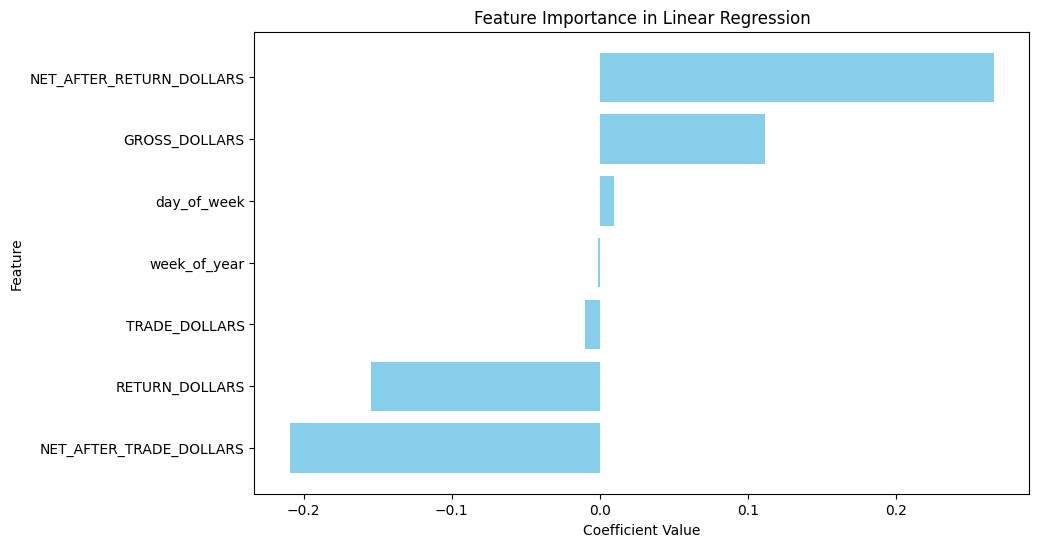

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the model coefficients
feature_importance = model.coef_

# Get feature names
feature_names = X_train.columns

# Sort by importance
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()


In [20]:
#Random Forest is non-linear, robust, and often more accurate.
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"🌲 Mean Squared Error (MSE) - Random Forest: {mse_rf:.2f}")
print(f"🌲 R-squared Score (R2) - Random Forest: {r2_rf:.2f}")


🌲 Mean Squared Error (MSE) - Random Forest: 0.05
🌲 R-squared Score (R2) - Random Forest: 1.00


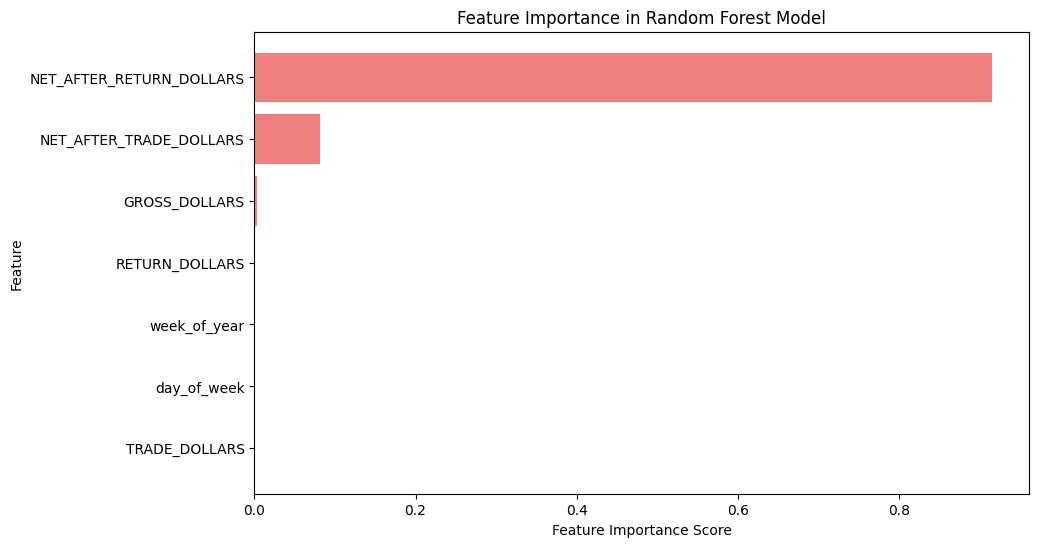

In [21]:
# Get feature importances from the model
importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort by importance
sorted_idx = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx], color="lightcoral")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()


               Model  Mean Squared Error (MSE)  R-squared Score (R2)
0  Linear Regression                      0.78                  0.98
1      Random Forest                      0.05                  1.00


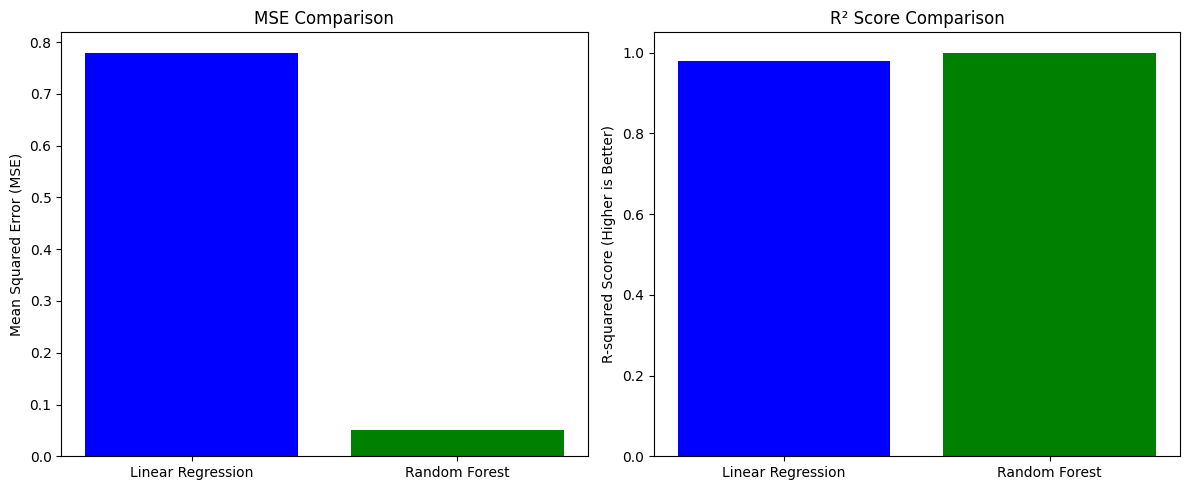

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "Mean Squared Error (MSE)": [0.78, 0.05],  # Replace with actual MSE values
    "R-squared Score (R2)": [0.98, 1.00]  # Replace with actual R2 values
})

# Display the table
print(model_comparison)

# Plot Comparison (Bar Chart)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot MSE
ax[0].bar(model_comparison["Model"], model_comparison["Mean Squared Error (MSE)"], color=['blue', 'green'])
ax[0].set_title("MSE Comparison")
ax[0].set_ylabel("Mean Squared Error (MSE)")

# Plot R2 Score
ax[1].bar(model_comparison["Model"], model_comparison["R-squared Score (R2)"], color=['blue', 'green'])
ax[1].set_title("R² Score Comparison")
ax[1].set_ylabel("R-squared Score (Higher is Better)")

plt.tight_layout()
plt.show()


In [23]:
# Create lag features (past return values)
df['RETURN_UNITS_LAG1'] = df['RETURN_UNITS'].shift(1)
df['RETURN_UNITS_LAG7'] = df['RETURN_UNITS'].shift(7)  # One week prior
df['RETURN_UNITS_LAG30'] = df['RETURN_UNITS'].shift(30)  # One month prior

# Create moving averages
df['RETURN_UNITS_MA7'] = df['RETURN_UNITS'].rolling(window=7).mean()
df['RETURN_UNITS_MA30'] = df['RETURN_UNITS'].rolling(window=30).mean()

# Drop initial rows with NaN due to shifting
df.dropna(inplace=True)

# Check new features
print(df[['RAWDATE', 'RETURN_UNITS', 'RETURN_UNITS_LAG1', 'RETURN_UNITS_MA7']].head())


           RAWDATE  RETURN_UNITS  RETURN_UNITS_LAG1  RETURN_UNITS_MA7
571068  2023-07-10             0                7.0          2.857143
571072  2023-07-10             0                0.0          2.285714
571073  2023-07-10             0                0.0          2.000000
571074  2023-07-10             0                0.0          1.000000
571075  2023-07-10             0                0.0          1.000000


In [24]:
from sklearn.model_selection import train_test_split

# Select features
features = ['RETURN_UNITS_LAG1', 'RETURN_UNITS_LAG7', 'RETURN_UNITS_LAG30', 'RETURN_UNITS_MA7', 'RETURN_UNITS_MA30']
target = 'RETURN_UNITS'

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, shuffle=False)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")


Training Samples: 468372
Testing Samples: 117093


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(y_train, order=(3, 1, 2))  # (p, d, q) - Adjust if needed
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=len(y_test))

# Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"🔍 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

🔍 Mean Absolute Error (MAE): 0.74
📉 Mean Squared Error (MSE): 1.27


In [67]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00


In [2]:
!pip install prophet


In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [7]:
# Ensure the date column is in datetime format
df['RAWDATE'] = pd.to_datetime(df['RAWDATE'])

# Create Prophet-compatible dataframe
df_prophet = df[['RAWDATE', 'RETURN_UNITS']].rename(columns={'RAWDATE': 'ds', 'RETURN_UNITS': 'y'})

# Sort values by date
df_prophet = df_prophet.sort_values(by='ds')


In [8]:
# Initialize the model
prophet_model = Prophet()

# Fit the model on historical data
prophet_model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdh5rnfqs/fwkno8aq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdh5rnfqs/bbxzvsq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53024', 'data', 'file=/tmp/tmpdh5rnfqs/fwkno8aq.json', 'init=/tmp/tmpdh5rnfqs/bbxzvsq2.json', 'output', 'file=/tmp/tmpdh5rnfqs/prophet_model33yb5p5d/prophet_model-20250213230908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:09:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
# Create future dataframe (90 days ahead)
future = prophet_model.make_future_dataframe(periods=90)

# Predict
forecast = prophet_model.predict(future)


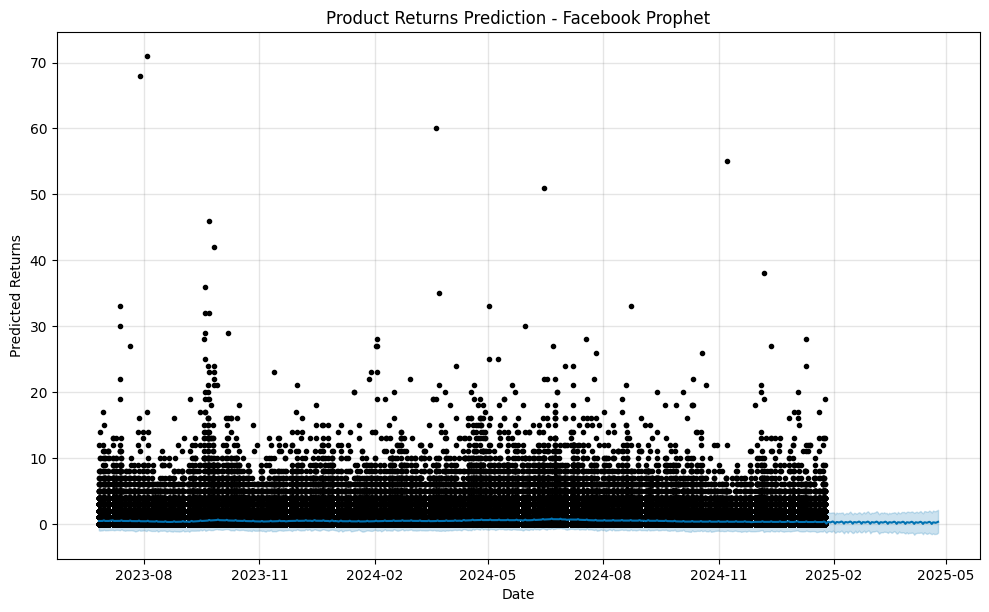

In [10]:
# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title("Product Returns Prediction - Facebook Prophet")
plt.xlabel("Date")
plt.ylabel("Predicted Returns")
plt.show()


In [11]:
# Show predicted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
489,2025-04-16,0.166475,-1.519218,1.831975
490,2025-04-17,0.229357,-1.449676,1.863894
491,2025-04-18,0.318831,-1.333730,2.020705
492,2025-04-19,0.220440,-1.473656,1.903114
493,2025-04-20,-0.013268,-1.566320,1.723880
494,2025-04-21,0.226252,-1.444990,2.027992
495,2025-04-22,0.218811,-1.542373,1.935456
496,2025-04-23,0.161950,-1.528736,1.933660
497,2025-04-24,0.224832,-1.493495,2.037905
498,2025-04-25,0.314306,-1.332645,2.133110


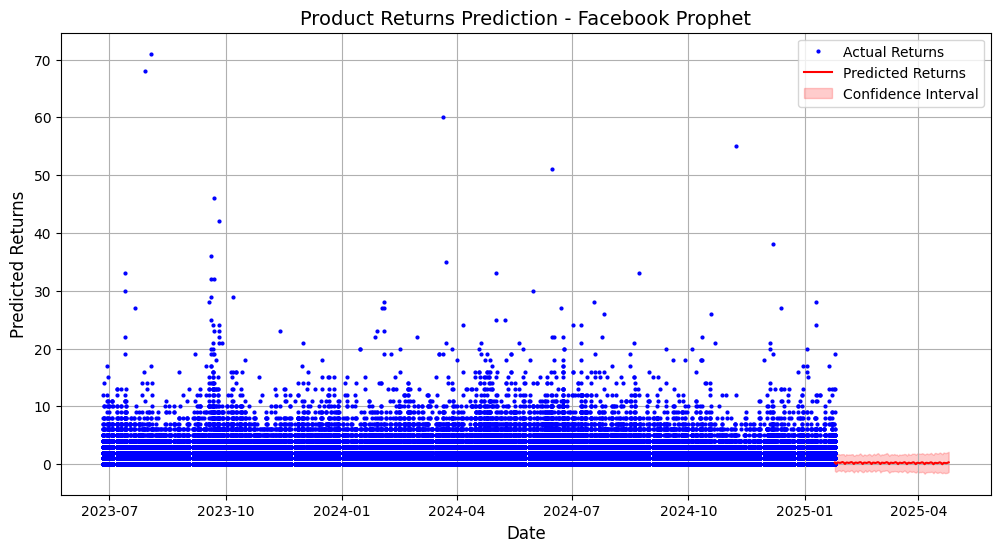

In [12]:
# Filter for only future dates
future_forecast = forecast[forecast['ds'] >= df_prophet['ds'].max()]

# Plot improved forecast
plt.figure(figsize=(12,6))
plt.plot(df_prophet['ds'], df_prophet['y'], 'bo', markersize=2, label="Actual Returns")  # Historical data
plt.plot(future_forecast['ds'], future_forecast['yhat'], 'r-', label="Predicted Returns")  # Predictions
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'],
                 color='red', alpha=0.2, label="Confidence Interval")

# Labels and title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Predicted Returns", fontsize=12)
plt.title("Product Returns Prediction - Facebook Prophet", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


📌 XGBoost Mean Squared Error (MSE): 0.02
🚀 XGBoost R-squared Score (R²): 0.98


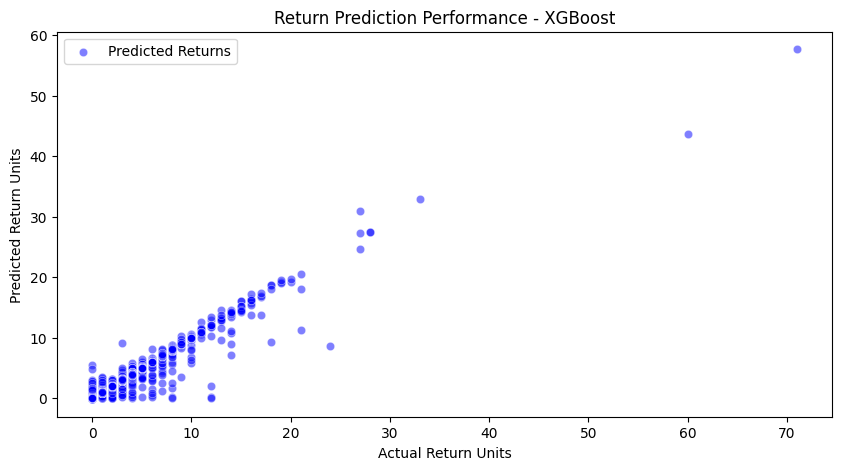

In [21]:
# Install XGBoost if not installed
!pip install xgboost

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/final_cleaned_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert 'RAWDATE' to datetime format
df['RAWDATE'] = pd.to_datetime(df['RAWDATE'])

# Sort by SKU and Date for correct rolling calculations
df = df.sort_values(by=['SKU', 'RAWDATE'])

# Create Time-based Features
df['day_of_week'] = df['RAWDATE'].dt.dayofweek
df['week_of_year'] = df['RAWDATE'].dt.isocalendar().week
df['month'] = df['RAWDATE'].dt.month

# Compute 26-week Moving Average for Return Units
df['26_week_return_avg'] = df.groupby('SKU')['RETURN_UNITS'].transform(lambda x: x.rolling(26, min_periods=1).mean())

# Handle missing values by filling with 0
df.fillna(0, inplace=True)

# Define Features and Target for Model
features = ['day_of_week', 'week_of_year', 'month', 'NET_UNITS', 'GROSS_DOLLARS',
            'NET_AFTER_TRADE_DOLLARS', '26_week_return_avg']
target = 'RETURN_UNITS'

# Split data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model Performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"📌 XGBoost Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"🚀 XGBoost R-squared Score (R²): {r2_xgb:.2f}")

# Visualizing Actual vs Predicted Returns
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5, color='blue', label="Predicted Returns")
plt.xlabel("Actual Return Units")
plt.ylabel("Predicted Return Units")
plt.title("Return Prediction Performance - XGBoost")
plt.legend()
plt.show()


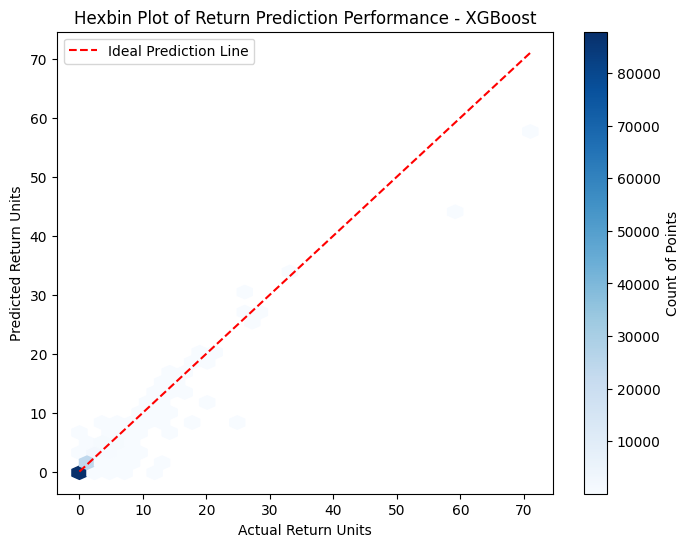

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
hb = plt.hexbin(y_test, y_pred_xgb, gridsize=30, cmap="Blues", mincnt=1)
plt.colorbar(hb, label="Count of Points")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction Line")

plt.xlabel("Actual Return Units")
plt.ylabel("Predicted Return Units")
plt.title("Hexbin Plot of Return Prediction Performance - XGBoost")
plt.legend()
plt.show()


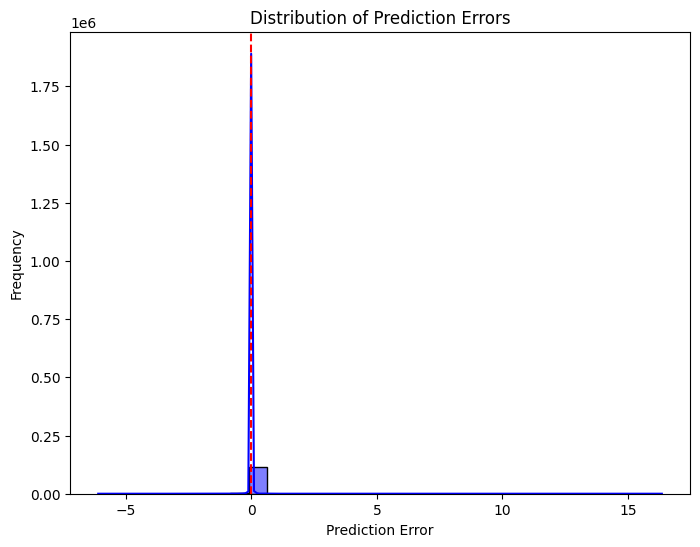

In [24]:
import seaborn as sns

errors = y_test - y_pred_xgb

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


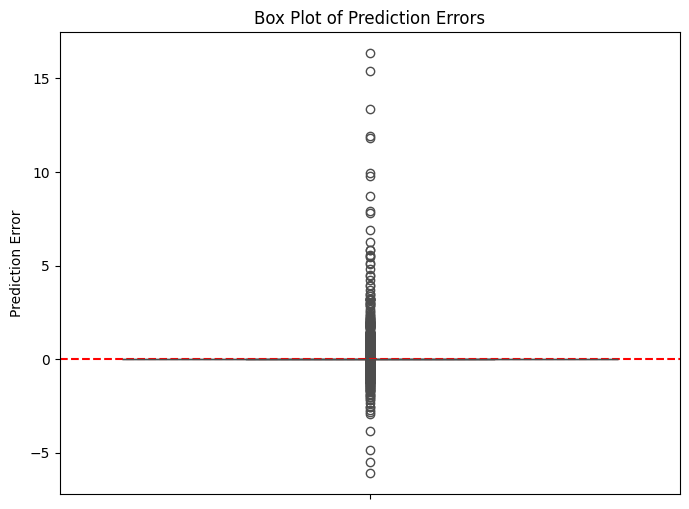

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=errors, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.ylabel("Prediction Error")
plt.title("Box Plot of Prediction Errors")
plt.show()


In [4]:
import pandas as pd

# Aggregate return units per SKU
sku_return_summary = df.groupby("SKU_DESCRIPTION")["RETURN_UNITS"].agg(["sum", "mean", "count"]).reset_index()

# Rename columns for clarity
sku_return_summary.columns = ["SKU_DESCRIPTION", "Total_Returns", "Average_Returns", "Transactions"]

# Sort by Total Returns to identify high-return products
top_return_skus = sku_return_summary.sort_values(by="Total_Returns", ascending=False).head(10)

# Display the top 10 products with highest returns - Replace ace_tools with display()
display(top_return_skus) # Use display() to show the DataFrame in Jupyter

,SKU_DESCRIPTION,Total_Returns,Average_Returns,Transactions
0,100% BREAD WW,28612.0,0.560624,51036
29,HONEY SWEET,26609.0,0.520836,51089
33,MULTIGRAIN OAT,24197.0,0.487666,49618
35,ROCKY MT SOUR,23967.0,0.461223,51964
44,THIN HON WHT,21475.0,0.508766,42210
45,THIN RM SOUR,19063.0,0.437958,43527
42,THIN 100% WHT,16814.0,0.438721,38325
43,THIN CM WHITE,15385.0,0.602011,25556
8,COUNTRY MORN,15130.0,0.494380,30604
37,SD HOT DOG,9131.0,0.535229,17060


from matplotlib import pyplot as plt
top_return_skus['Total_Returns'].plot(kind='hist', bins=20, title='Total_Returns')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_return_skus['Average_Returns'].plot(kind='hist', bins=20, title='Average_Returns')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_return_skus['Transactions'].plot(kind='hist', bins=20, title='Transactions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_return_skus.plot(kind='scatter', x='Total_Returns', y='Average_Returns', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_return_skus.plot(kind='scatter', x='Average_Returns', y='Transactions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_return_skus['Total_Returns'].plot(kind='line', figsize=(8, 4), title='Total_Returns')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_return_skus['Average_Returns'].plot(kind='line', figsize=(8, 4), title='Average_Returns')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_return_skus['Transactions'].plot(kind='line', figsize=(8, 4), title='Transactions')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# prompt: Using dataframe top_return_skus: suggest a plot

import altair as alt

# Create a bar chart showing the total returns for each SKU
alt.Chart(top_return_skus).mark_bar().encode(
    x='SKU_DESCRIPTION:N',
    y='Total_Returns:Q'
).properties(
    title='Total Returns by SKU'
)


alt.Chart(...)

In [17]:
import pandas as pd

# Aggregate return units per SKU, Retailer, and Store City
return_summary = df.groupby(["SKU_DESCRIPTION", "RETAILER", "STORE_CITY"])["RETURN_UNITS"].agg(["sum", "mean", "count"]).reset_index()

# Rename columns for clarity
return_summary.columns = ["SKU_DESCRIPTION", "RETAILER", "STORE_CITY", "Total_Returns", "Average_Returns", "Transactions"]

# Sort by Total Returns to identify high-return products
top_return_summary = return_summary.sort_values(by="Total_Returns", ascending=False).head(10)

# Display the top 10 products with highest returns across retailers and store cities
display(top_return_summary)  # Use display() to show the DataFrame in Jupyter


,SKU_DESCRIPTION,RETAILER,STORE_CITY,Total_Returns,Average_Returns,Transactions
1803,THIN CM WHITE,KING SOOPERS,boulder,1093.0,0.368386,2967
1292,MULTIGRAIN OAT,KING SOOPERS,boulder,976.0,0.311224,3136
1858,THIN HON WHT,KING SOOPERS,boulder,893.0,0.285212,3131
1096,HONEY SWEET,KING SOOPERS,boulder,834.0,0.263009,3171
1447,ROCKY MT SOUR,KING SOOPERS,boulder,732.0,0.227541,3217
5,100% BREAD WW,KING SOOPERS,boulder,648.0,0.205453,3154
1707,THIN 100% WHT,KING SOOPERS,boulder,564.0,0.178651,3157
1974,THIN RM SOUR,KING SOOPERS,boulder,497.0,0.155799,3190
1425,MULTIGRAIN OAT,WHOLE FOODS MARKET (CO),boulder,308.0,0.897959,343
1883,THIN HON WHT,SAFEWAY (CO),colorado springs,201.0,0.610942,329


In [11]:
# Calculate net sales per store
store_profitability = df.groupby("STORE")["NET_AFTER_RETURN_DOLLARS"].sum().reset_index()

# Rename column for clarity
store_profitability.columns = ["STORE", "Total_Net_Sales"]

# Sort by total net sales (descending) to identify the most profitable stores
most_profitable_stores = store_profitability.sort_values(by="Total_Net_Sales", ascending=False)

# Display top stores
display(most_profitable_stores.head(10))


,STORE,Total_Net_Sales
22,COSTCO 1178 TIMNATH,179537.50
12,COSTCO #1030-CS,174500.00
21,COSTCO #676-WADSWORTH,126756.25
9,COSTCO #1014-CS,124787.50
306,VITAMIN COTTAGE ED,124681.22
333,WHOLE FOODS MARKET-BOULDER,124485.06
10,COSTCO #1022-PARKER,117425.00
18,COSTCO #468-PARK MEADOWS CENTE,114843.75
19,COSTCO #480-MARSHALL,105543.75
17,COSTCO #443-W. QUINCY,105062.50


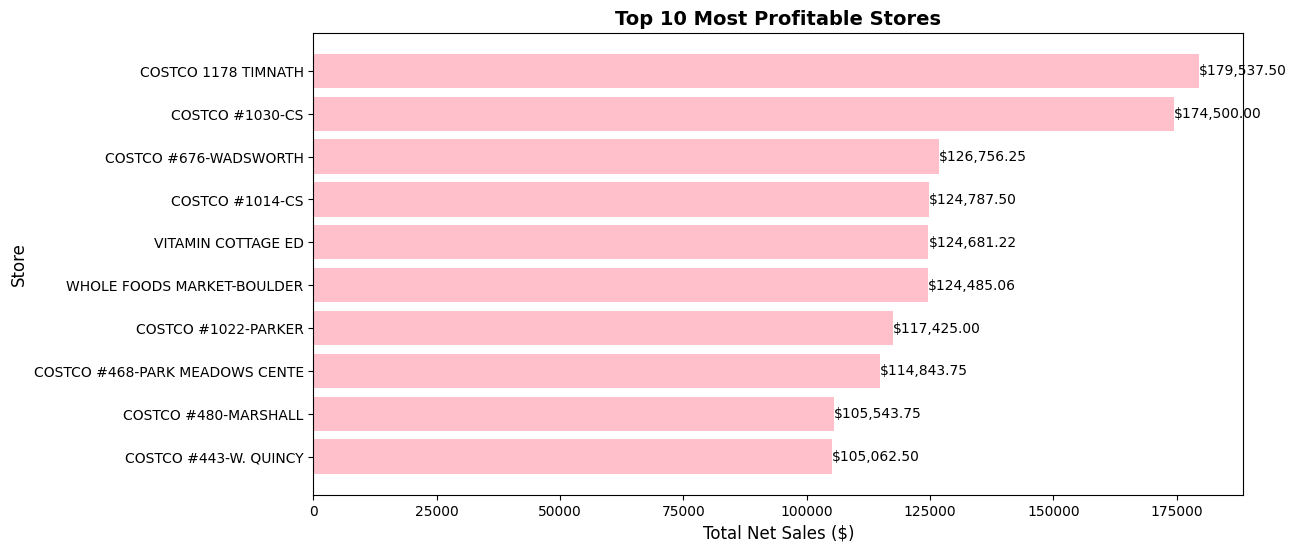

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (Replace with actual data)
data = {
    "STORE": [
        "COSTCO 1178 TIMNATH", "COSTCO #1030-CS", "COSTCO #676-WADSWORTH",
        "COSTCO #1014-CS", "VITAMIN COTTAGE ED", "WHOLE FOODS MARKET-BOULDER",
        "COSTCO #1022-PARKER", "COSTCO #468-PARK MEADOWS CENTE",
        "COSTCO #480-MARSHALL", "COSTCO #443-W. QUINCY"
    ],
    "Total_Net_Sales": [179537.50, 174500.00, 126756.25, 124787.50,
                         124681.22, 124485.06, 117425.00, 114843.75,
                         105543.75, 105062.50]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Sort by Total Net Sales (Descending)
df = df.sort_values(by="Total_Net_Sales", ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
bars = plt.barh(df["STORE"], df["Total_Net_Sales"], color="pink")

# Add value labels to bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"${bar.get_width():,.2f}",
             va='center', fontsize=10, color='black')

# Formatting
plt.xlabel("Total Net Sales ($)", fontsize=12)
plt.ylabel("Store", fontsize=12)
plt.title("Top 10 Most Profitable Stores", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show plot
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by SKU and calculate total net sales after returns
product_profitability = df.groupby("SKU_DESCRIPTION")["NET_AFTER_RETURN_DOLLARS"].sum().reset_index()

# Rename column for clarity
product_profitability.columns = ["SKU_DESCRIPTION", "Total_Net_Profit"]

# Sort by net profit (descending) to find the most profitable products
most_profitable_products = product_profitability.sort_values(by="Total_Net_Profit", ascending=False)

# Display top 10 most profitable products
display(most_profitable_products.head(10))

# Visualization
plt.figure(figsize=(12, 6))
bars = plt.barh(most_profitable_products["SKU_DESCRIPTION"].head(10),
                most_profitable_products["Total_Net_Profit"].head(10),
                color="green")

# Add value labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"${bar.get_width():,.2f}",
             va='center', fontsize=10, color='black')

# Formatting
plt.xlabel("Net Profit ($)", fontsize=12)
plt.ylabel("Product (SKU)", fontsize=12)
plt.title("Top 10 Most Profitable Products", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()  # Invert for readability

# Show plot
plt.show()


KeyError: 'SKU_DESCRIPTION'

<ipython-input-14-3dc87fd8d2d0>:6: DtypeWarning: Columns (2,3,4,6,7,8,9,10,11,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('/content/final_MERGED_dataset.csv') # Load the actual dataframe


,SKU_DESCRIPTION,Total_Net_Profit
35,ROCKY MT SOUR,2336867.27
34,RMS 2PK,1532106.25
29,HONEY SWEET,836508.31
0,100% BREAD WW,711813.27
45,THIN RM SOUR,690028.48
33,MULTIGRAIN OAT,534367.13
8,COUNTRY MORN,333848.48
44,THIN HON WHT,322480.24
42,THIN 100% WHT,297597.71
43,THIN CM WHITE,150647.40


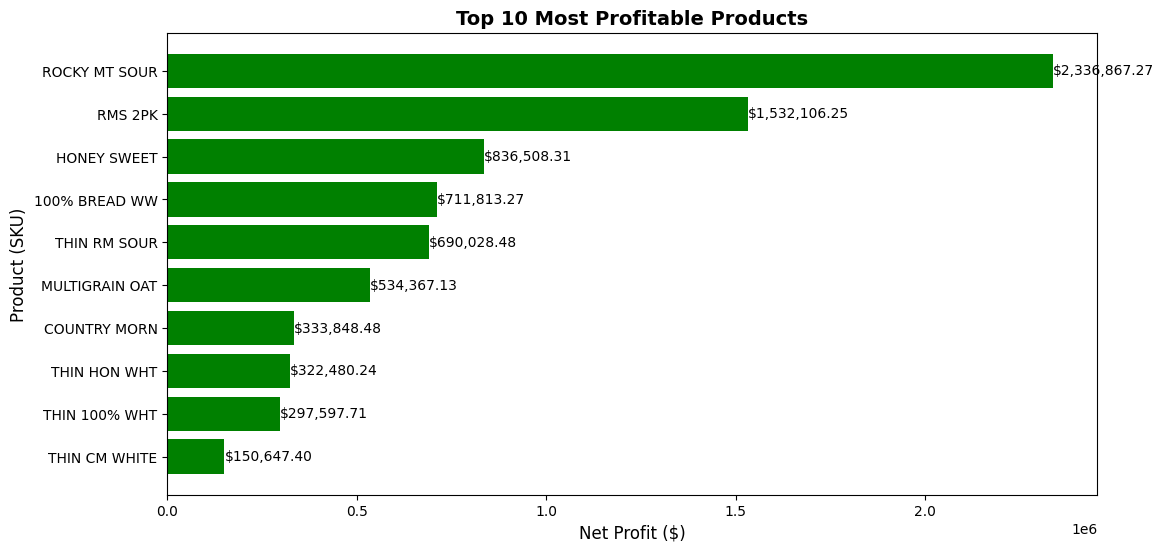

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your original DataFrame with product data is named 'original_df'
# Replace 'original_df' with the actual name of your DataFrame
original_df = pd.read_csv('/content/final_MERGED_dataset.csv') # Load the actual dataframe


# Group by SKU and calculate total net sales after returns
product_profitability = original_df.groupby("SKU_DESCRIPTION")["NET_AFTER_RETURN_DOLLARS"].sum().reset_index()

# Rename column for clarity
product_profitability.columns = ["SKU_DESCRIPTION", "Total_Net_Profit"]

# Sort by net profit (descending) to find the most profitable products
most_profitable_products = product_profitability.sort_values(by="Total_Net_Profit", ascending=False)

# Display top 10 most profitable products
display(most_profitable_products.head(10))

# Visualization
plt.figure(figsize=(12, 6))
bars = plt.barh(most_profitable_products["SKU_DESCRIPTION"].head(10),
                most_profitable_products["Total_Net_Profit"].head(10),
                color="green")

# Add value labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"${bar.get_width():,.2f}",
             va='center', fontsize=10, color='black')

# Formatting
plt.xlabel("Net Profit ($)", fontsize=12)
plt.ylabel("Product (SKU)", fontsize=12)
plt.title("Top 10 Most Profitable Products", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()  # Invert for readability

# Show plot
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

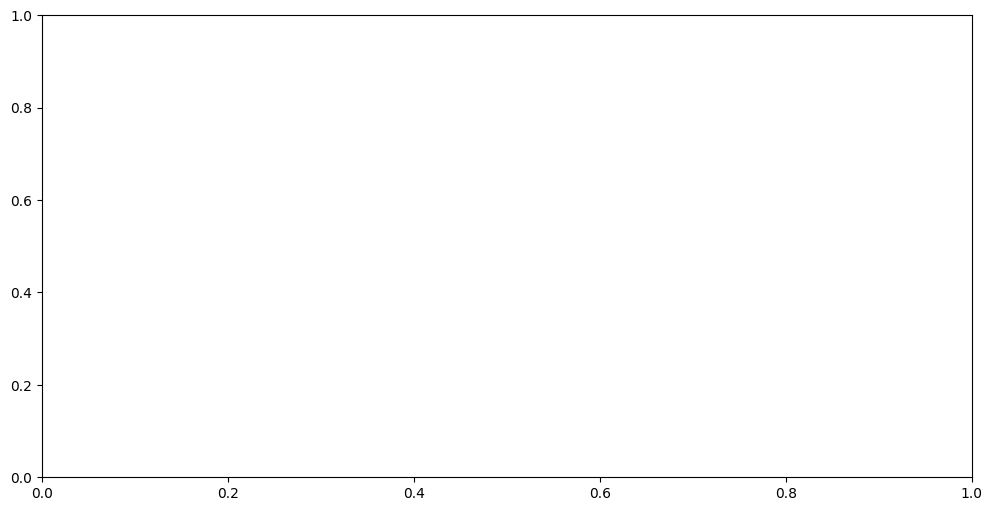

In [10]:
plt.figure(figsize=(12, 6))
bars = plt.barh(df["STORE"], df["NET_AFTER_RETURN_DOLLARS"], color="pink")

# Add value labels to bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"${bar.get_width():,.2f}",
             va='center', fontsize=10, color='black')

# Formatting
plt.xlabel("Total Net Sales ($)", fontsize=12)
plt.ylabel("Store", fontsize=12)
plt.title("Top 10 Most Profitable Stores", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show plot
plt.show()

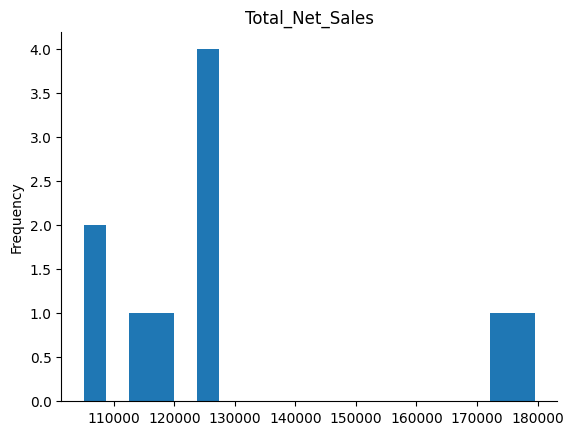

In [7]:
from matplotlib import pyplot as plt
_df_0['Total_Net_Sales'].plot(kind='hist', bins=20, title='Total_Net_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

,STORE,Total_Net_Sales
12,COSTCO #1030-CS,32087.50
22,COSTCO 1178 TIMNATH,32012.50
9,COSTCO #1014-CS,23662.50
328,WHOLE FOODS MARKET-BOULDER,23583.15
10,COSTCO #1022-PARKER,23450.00
21,COSTCO #676-WADSWORTH,22037.50
18,COSTCO #468-PARK MEADOWS CENTE,21987.50
301,VITAMIN COTTAGE ED,21328.86
17,COSTCO #443-W. QUINCY,20631.25
20,COSTCO #629-N. WASHINGTON,19125.00


<ipython-input-15-4aa121506f1c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_profitable_stores.head(10),


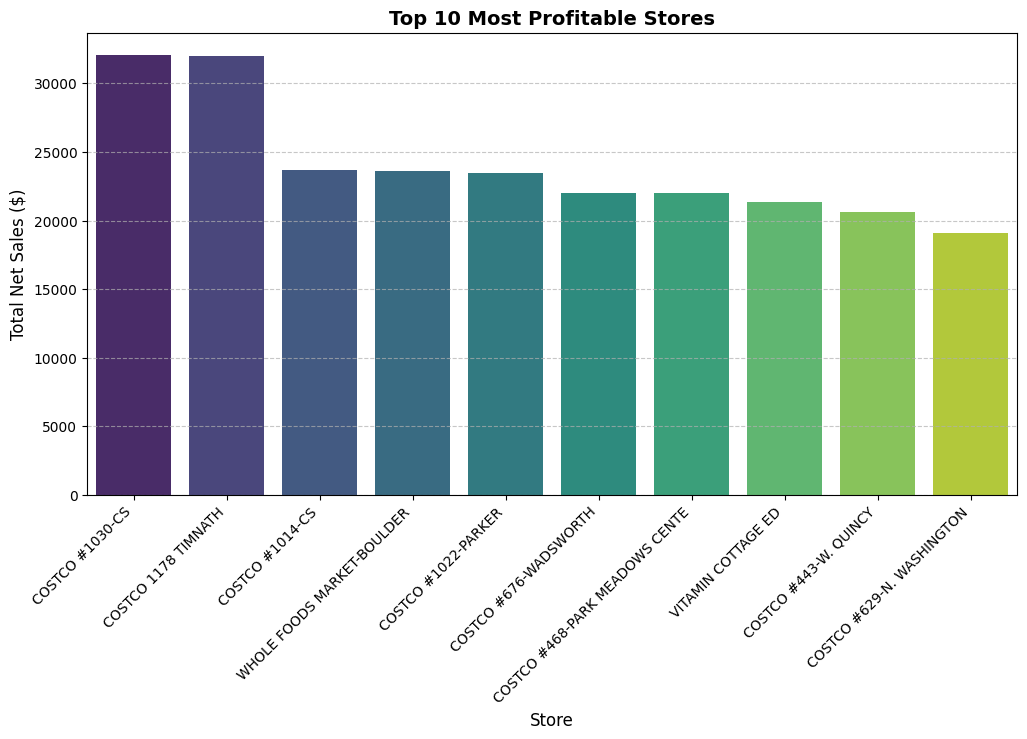

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate net sales per store
store_profitability = df.groupby("STORE")["NET_AFTER_RETURN_DOLLARS"].sum().reset_index()

# Rename column for clarity
store_profitability.columns = ["STORE", "Total_Net_Sales"]

# Sort by total net sales (descending) to identify the most profitable stores
most_profitable_stores = store_profitability.sort_values(by="Total_Net_Sales", ascending=False)

# Display top 10 stores
display(most_profitable_stores.head(10))

# Visualization: Top 10 Most Profitable Stores
plt.figure(figsize=(12, 6))
sns.barplot(data=most_profitable_stores.head(10),
            x="STORE", y="Total_Net_Sales", palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Most Profitable Stores", fontsize=14, fontweight="bold")
plt.xlabel("Store", fontsize=12)
plt.ylabel("Total Net Sales ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [20]:
# Load the dataset (if not already loaded)
df = pd.read_csv("/content/final_cleaned_dataset.csv")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure FORMATTEDDATE is in datetime format
df["FORMATTEDDATE"] = pd.to_datetime(df["FORMATTEDDATE"])

# Filter data for Boulder 2025
boulder_sales = df[(df["STORE_CITY"] == "Boulder") & (df["FORMATTEDDATE"].dt.year == 2025)]

# Aggregate sales per month
boulder_sales_monthly = boulder_sales.groupby(df["FORMATTEDDATE"].dt.to_period("M"))["NET_AFTER_RETURN_DOLLARS"].sum()

# Visualization: Line Chart for Monthly Sales
plt.figure(figsize=(10, 5))
plt.plot(boulder_sales_monthly.index.astype(str), boulder_sales_monthly, marker="o", linestyle="-", color="green")

plt.title("Boulder 2025 Sales Trends", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


KeyError: 'FORMATTEDDATE'

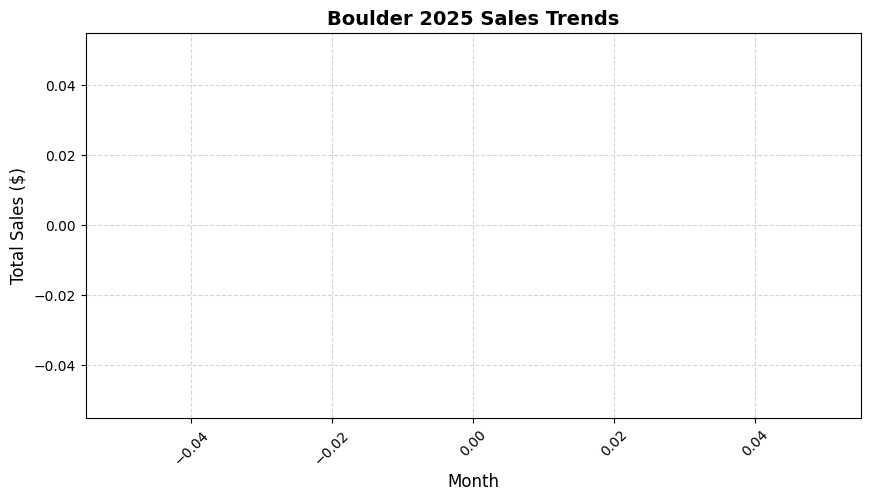

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (if not already loaded)
df = pd.read_csv("/content/final_cleaned_dataset.csv")  # Update path if needed

# Check if the column 'FORMATTEDDATE' exists
if 'FORMATTEDDATE' in df.columns:
    # Ensure 'FORMATTEDDATE' is in datetime format
    df["FORMATTEDDATE"] = pd.to_datetime(df["FORMATTEDDATE"], errors='coerce')

    # Filter data for Boulder 2025
    boulder_sales = df[(df["STORE_CITY"] == "Boulder") & (df["FORMATTEDDATE"].dt.year == 2025)]

    # Aggregate sales per month
    boulder_sales_monthly = boulder_sales.groupby(df["FORMATTEDDATE"].dt.to_period("M"))["NET_AFTER_RETURN_DOLLARS"].sum()

    # Visualization: Line Chart for Monthly Sales
    plt.figure(figsize=(10, 5))
    plt.plot(boulder_sales_monthly.index.astype(str), boulder_sales_monthly, marker="o", linestyle="-", color="green")

    plt.title("Boulder 2025 Sales Trends", fontsize=14, fontweight="bold")
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Total Sales ($)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()
else:
    print("Column 'FORMATTEDDATE' not found in DataFrame.")

In [7]:
df = "/content/final_cleaned_dataset.csv"

In [9]:
df

'/content/final_cleaned_dataset.csv'

In [2]:
# prompt: i want to laod. the dataset

import pandas as pd
df = pd.read_csv("/content/final_cleaned_dataset.csv")
print(df.head())


   UNNAMED:_0  ROUTENO     ROUTE_DESCRIPTION     RAWDATE FORMATTEDDATE   SKU  \
0           0      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
1           1      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
2           2      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   
3           3      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2040   
4           4      751  751 SOUTHWEST DENVER  2025-01-25    2025-01-25  2060   

  SKU_DESCRIPTION                 RETAILER CUSTOMER_ACCT  \
0     HONEY SWEET             KING SOOPERS     1101-0047   
1     HONEY SWEET             KING SOOPERS     1101-0019   
2     HONEY SWEET             KING SOOPERS     1101-0122   
3    COUNTRY MORN  WHOLE FOODS MARKET (CO)     2318-0021   
4     HONEY SWEET             KING SOOPERS     1101-0109   

                STORE_ADDRESS  ... GROSS_DOLLARS RETURN_DOLLARS  \
0  7575 south university blvd  ...         10.04           0.00   
1    3100 south sheridan

In [2]:
# prompt: in csv file, it shows 565301 records but when i am doing shape it is only showinh 22k

import pandas as pd
df = pd.read_csv("/content/final_cleaned_dataset.csv", low_memory=False)
df.shape


(16679, 22)

In [3]:
# prompt: in csv file, it shows 565301 records but when i am doing shape it is (585495, 22)

import pandas as pd

df = pd.read_csv("/content/final_cleaned_dataset.csv", low_memory=False)
print(df.tail()) # Inspect the last few rows for blank rows

# Print the number of rows in the CSV
!wc -l /content/final_cleaned_dataset.csv

# Count the rows in the pandas dataframe
print(len(df))


        UNNAMED:_0  ROUTENO   ROUTE_DESCRIPTION     RAWDATE FORMATTEDDATE  \
110723      106841      755  755 SOUTH COL SPGS  2024-10-10    2024-10-10   
110724      106842      756          756 ARVADA  2024-10-10    2024-10-10   
110725      106842      756          756 ARVADA  2024-10-10    2024-10-10   
110726      106843      756          756 ARVADA  2024-10-10    2024-10-10   
110727      106844      756          756 ARVADA  2024-10-10    2024-10-10   

         SKU SKU_DESCRIPTION                     RETAILER CUSTOMER_ACCT  \
110723  9450    GF SOURDOUGH  SPROUTS FARMERS MARKET (CO)     1984-0332   
110724  2040    COUNTRY MORN  SPROUTS FARMERS MARKET (CO)     1984-0008   
110725  2040    COUNTRY MORN  SPROUTS FARMERS MARKET (CO)     1984-0008   
110726  2060     HONEY SWEET                 KING SOOPERS     1101-0003   
110727  4100   THIN 100% WHT                 SAFEWAY (CO)     1941-1656   

              STORE_ADDRESS  ... GROSS_DOLLARS RETURN_DOLLARS  \
110723       5617 bar

In [4]:
df = df.drop(columns=['UNNAMED:_0'])


In [5]:
df.describe()

,ROUTENO,SKU,GROSS_DOLLARS,RETURN_DOLLARS,NET_AFTER_RETURN_DOLLARS,TRADE_DOLLARS,NET_AFTER_TRADE_DOLLARS,GROSS_UNITS,RETURN_UNITS,NET_UNITS
count,110728.000000,110728.000000,110727.000000,110727.000000,110727.000000,110727.000000,110727.000000,110727.000000,110727.000000,110727.000000
mean,758.632315,4702.480890,16.019365,1.481937,14.537428,0.108449,14.431910,3.293334,0.322297,2.971037
std,5.092522,4666.590031,38.799765,4.213731,38.993995,0.701889,38.905203,6.539359,0.889904,6.608048
min,751.000000,2040.000000,0.000000,0.000000,-266.060000,0.000000,-266.060000,0.000000,0.000000,-53.000000
25%,755.000000,2120.000000,4.880000,0.000000,3.940000,0.000000,3.940000,1.000000,0.000000,1.000000
50%,758.000000,4110.000000,9.760000,0.000000,9.080000,0.000000,9.080000,2.000000,0.000000,2.000000
75%,763.000000,6048.000000,15.200000,0.000000,15.060000,0.000000,15.060000,4.000000,0.000000,3.000000
max,767.000000,54207.000000,862.500000,276.100000,862.500000,16.560000,862.500000,138.000000,55.000000,138.000000


In [6]:
# Install statsmodels if not installed
!pip install statsmodels

# Import the required module
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [8]:
import matplotlib.pyplot as plt


In [10]:
# Convert RAWDATE and FORMATTEDDATE to datetime format
df['RAWDATE'] = pd.to_datetime(df['RAWDATE'], errors='coerce')
df['FORMATTEDDATE'] = pd.to_datetime(df['FORMATTEDDATE'], errors='coerce')

# Verify conversion
print(df.dtypes)


ROUTENO                              int64
ROUTE_DESCRIPTION                   object
RAWDATE                     datetime64[ns]
FORMATTEDDATE               datetime64[ns]
SKU                                  int64
SKU_DESCRIPTION                     object
RETAILER                            object
CUSTOMER_ACCT                       object
STORE_ADDRESS                       object
STORE_CITY                          object
STORE_STATE                         object
GROSS_DOLLARS                      float64
RETURN_DOLLARS                     float64
NET_AFTER_RETURN_DOLLARS           float64
TRADE_DOLLARS                      float64
NET_AFTER_TRADE_DOLLARS            float64
GROSS_UNITS                          int64
RETURN_UNITS                         int64
NET_UNITS                            int64
STORE                               object
STORE_ZIP                           object
dtype: object


In [11]:
print(df.isnull().sum())


ROUTENO                     0
ROUTE_DESCRIPTION           0
RAWDATE                     0
FORMATTEDDATE               0
SKU                         0
SKU_DESCRIPTION             0
RETAILER                    0
CUSTOMER_ACCT               0
STORE_ADDRESS               0
STORE_CITY                  0
STORE_STATE                 0
GROSS_DOLLARS               0
RETURN_DOLLARS              0
NET_AFTER_RETURN_DOLLARS    0
TRADE_DOLLARS               0
NET_AFTER_TRADE_DOLLARS     0
GROSS_UNITS                 0
RETURN_UNITS                0
NET_UNITS                   0
STORE                       0
STORE_ZIP                   0
dtype: int64


In [6]:
# Set FORMATTEDDATE as index and sort
df = df.sort_values(by='FORMATTEDDATE')
df.set_index('FORMATTEDDATE', inplace=True)

# Verify the changes
print(df.head())


               ROUTENO    ROUTE_DESCRIPTION     RAWDATE   SKU SKU_DESCRIPTION  \
FORMATTEDDATE                                                                   
2024-10-10         756           756 ARVADA  2024-10-10  4100   THIN 100% WHT   
2024-10-10         752  752 HIGHLANDS RANCH  2024-10-10  4110    THIN HON WHT   
2024-10-10         752  752 HIGHLANDS RANCH  2024-10-10  4130   THIN CM WHITE   
2024-10-10         752  752 HIGHLANDS RANCH  2024-10-10  4110    THIN HON WHT   
2024-10-10         753      753 EAST DENVER  2024-10-10  2060     HONEY SWEET   

                      RETAILER CUSTOMER_ACCT                   STORE_ADDRESS  \
FORMATTEDDATE                                                                  
2024-10-10        SAFEWAY (CO)     1941-1656                   1601 coalton    
2024-10-10        KING SOOPERS     1101-0008  2205 west wildcat reserve pkwy   
2024-10-10        KING SOOPERS     1101-0027      9551 south university blvd   
2024-10-10     VITAMIN COTTAGE  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


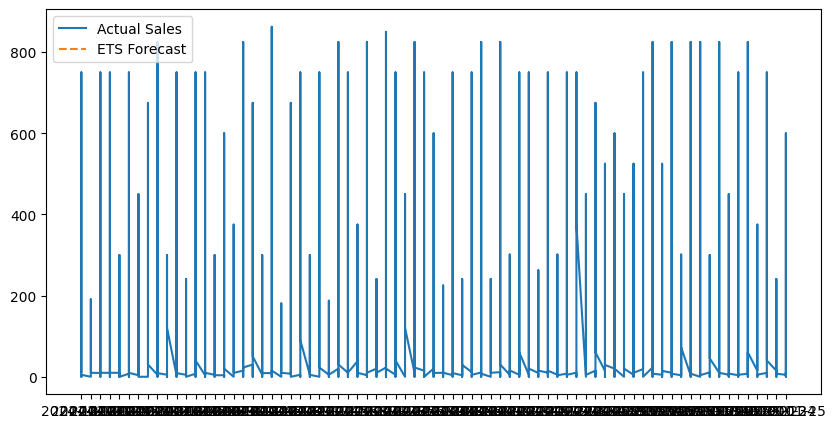

In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Exponential Smoothing
model_ets = ExponentialSmoothing(df['GROSS_DOLLARS'], trend="add", seasonal="add", seasonal_periods=12).fit()

# Forecast next 12 periods
ets_forecast = model_ets.forecast(12)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df.index, df['GROSS_DOLLARS'], label="Actual Sales")
plt.plot(ets_forecast.index, ets_forecast, label="ETS Forecast", linestyle="dashed")
plt.legend()
plt.show()


In [18]:
df = df.dropna(subset=['FORMATTEDDATE'])


In [19]:
df = df.sort_values(by='FORMATTEDDATE')  # Sort by date
df.set_index('FORMATTEDDATE', inplace=True)  # Set as index
df.index = pd.to_datetime(df.index)  # Ensure correct datetime format


In [21]:
print(df.index.inferred_freq)


None


In [23]:
print(df.index.duplicated().sum())  # Count duplicate dates


585086


In [24]:
df = df[~df.index.duplicated(keep='first')]


In [25]:
print(df.index.duplicated().sum())

0


In [26]:
df = df.asfreq('MS')  # 'MS' stands for "Month Start"


In [27]:
df = df.asfreq('W')


In [28]:
df = df.asfreq('W')  # Setting frequency to Weekly


In [29]:
print(df.index.freq)


<Week: weekday=6>


In [31]:
print(len(df))


79


In [33]:
print(df['GROSS_DOLLARS'].isnull().sum())  # Count missing values


79


In [34]:
df['GROSS_DOLLARS'].fillna(method='ffill', inplace=True)  # Forward fill missing values


<ipython-input-34-dd762f9cbe7d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['GROSS_DOLLARS'].fillna(method='ffill', inplace=True)  # Forward fill missing values


In [35]:
df['GROSS_DOLLARS'].fillna(method='ffill', inplace=True)


<ipython-input-35-70eaa8861e9e>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['GROSS_DOLLARS'].fillna(method='ffill', inplace=True)


In [36]:
df['GROSS_DOLLARS'] = df['GROSS_DOLLARS'].ffill()


In [39]:
df

,ROUTENO,ROUTE_DESCRIPTION,RAWDATE,SKU,SKU_DESCRIPTION,RETAILER,CUSTOMER_ACCT,STORE_ADDRESS,STORE_CITY,STORE_STATE,GROSS_DOLLARS,RETURN_DOLLARS,NET_AFTER_RETURN_DOLLARS,TRADE_DOLLARS,NET_AFTER_TRADE_DOLLARS,GROSS_UNITS,RETURN_UNITS,NET_UNITS,STORE,STORE_ZIP
FORMATTEDDATE,,,,,,,,,,,,,,,,,,,,
2023-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df['GROSS_DOLLARS'] = pd.to_numeric(df['GROSS_DOLLARS'], errors='coerce')


In [38]:
df.isnull().sum()

,0
ROUTENO,79
ROUTE_DESCRIPTION,79
RAWDATE,79
SKU,79
SKU_DESCRIPTION,79
RETAILER,79
CUSTOMER_ACCT,79
STORE_ADDRESS,79
STORE_CITY,79
STORE_STATE,79


In [32]:
model_ets = ExponentialSmoothing(df['GROSS_DOLLARS'], trend="add", seasonal="add", seasonal_periods=26).fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/exponential_smoothing/initialization.py:95: RuntimeWarning: Mean of empty slice
  initial_seasonal = np.nanmean(


ValueError: shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train ETS model
model_ets = ExponentialSmoothing(df['GROSS_DOLLARS'], trend="add", seasonal="add", seasonal_periods=52).fit()

# Forecast for next 12 weeks
forecast_periods = 12
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_periods + 1, freq='W')[1:]

ets_forecast = pd.Series(model_ets.forecast(forecast_periods), index=forecast_index)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df.index, df['GROSS_DOLLARS'], label="Actual Sales")
plt.plot(ets_forecast.index, ets_forecast, label="ETS Forecast", linestyle="dashed")
plt.legend()
plt.show()


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-20-712a3c879d42>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_periods + 1, freq='M')[1:]
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

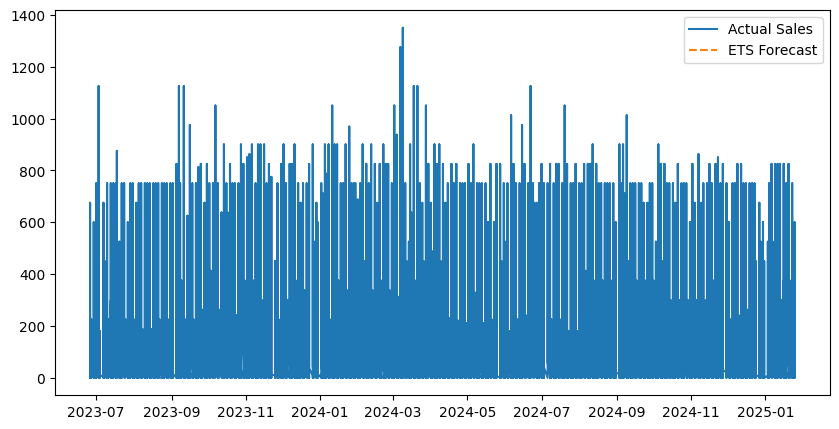

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train ETS model
model_ets = ExponentialSmoothing(df['GROSS_DOLLARS'], trend="add", seasonal="add", seasonal_periods=12).fit()

# Forecast for next 12 periods
forecast_periods = 12
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_periods + 1, freq='M')[1:]

ets_forecast = pd.Series(model_ets.forecast(forecast_periods), index=forecast_index)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['GROSS_DOLLARS'], label="Actual Sales")
plt.plot(ets_forecast.index, ets_forecast, label="ETS Forecast", linestyle="dashed")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


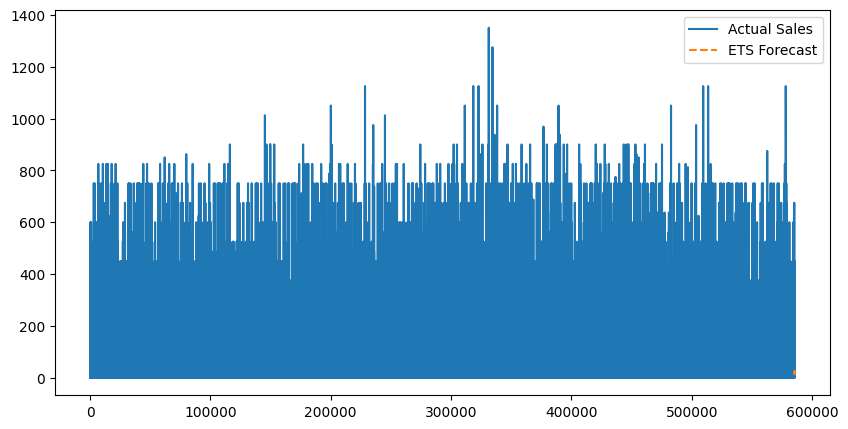

In [9]:
# Apply Exponential Smoothing
model_ets = ExponentialSmoothing(df['GROSS_DOLLARS'], trend="add", seasonal="add", seasonal_periods=12).fit()

# Forecast for next 12 periods
ets_forecast = model_ets.forecast(12)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df.index, df['GROSS_DOLLARS'], label="Actual Sales")
plt.plot(ets_forecast.index, ets_forecast, label="ETS Forecast", linestyle="dashed")
plt.legend()
plt.show()
